In [43]:
import tensorflow as tf
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

**Reading file**

In [45]:
f= open('data.txt' , encoding = 'utf-8')
d= " "
x = []
for i in f:
    x.append(i)

xx = d.join(x)
#xx = x.split("\n")

data = xx.split("\n")
#print(yy[:10])

In [46]:
data

['',
 ' How many days do we have in a week?',
 ' How many days are there in a normal year?',
 ' How many colors are there in a rainbow?',
 ' Which animal is known as the â€˜Ship of the Desert?â€™',
 ' How many letters are there in the English alphabet?',
 ' How many consonants are there in the English alphabet?',
 ' How many sides are there in a triangle?',
 ' Which month of the year has the least number of days?',
 ' Which are the vowels in the English alphabet series?',
 ' Which animal is called King of Jungle?',
 ' How many primary colors are there?',
 ' How many days are there in the month of February in a leap year?',
 ' What do you call a house made of ice?',
 ' Which is the largest animal in the world?',
 ' Which is the tallest animal on the earth?',
 ' Which festival is known as the festival of colors?',
 ' Which festival is called the festival of light?',
 ' What is the top color in a rainbow?',
 ' What type of bird lays the largest eggs?',
 ' Which festival is known as the â€

In [47]:
len(data)

930

In [48]:
#joining data
final_data = " ".join(data)

**Cleaning text**

In [49]:
def clean_text(doc):
    tokens = doc.split(" ")   #white space seperation
    punc = str.maketrans("","",string.punctuation) # all punctuations
    tokens = [w.translate(punc) for w in tokens]  #remove punctuations
    tokens = [word for word in tokens if word.isalpha()]  #only alpha
    tokens = [word.lower() for word in tokens]  #lower
    return tokens

In [50]:
tokens = clean_text(final_data)

In [51]:
tokens[:30]

['how',
 'many',
 'days',
 'do',
 'we',
 'have',
 'in',
 'a',
 'week',
 'how',
 'many',
 'days',
 'are',
 'there',
 'in',
 'a',
 'normal',
 'year',
 'how',
 'many',
 'colors',
 'are',
 'there',
 'in',
 'a',
 'rainbow',
 'which',
 'animal',
 'is',
 'known']

In [52]:
token_length = len(tokens)   
token_length

7136

In [53]:
unique_token_len = len(set(tokens))   #length of unique word in tokens(Vocabulary Size)
unique_token_len

1409

**Creating a Data Sequence**

In [54]:

input_length = 50
lines = []

for i in range(input_length , len(tokens)):
    seq = tokens[i-input_length : i]  #0 to inp length
    line = " ".join(seq)   # join to make inp sequence
    lines.append(line)    # append in list
    
print(len(lines))


7086


In [55]:
#first input
lines[0]

'how many days do we have in a week how many days are there in a normal year how many colors are there in a rainbow which animal is known as the of the how many letters are there in the english alphabet how many consonants are there in the'

In [56]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,LSTM ,Dropout, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Tokenizing**

In [57]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)   
seq = tokenizer.texts_to_sequences(lines)

In [58]:
seq   #list of int values for the words

[[9,
  10,
  63,
  28,
  49,
  24,
  5,
  6,
  340,
  9,
  10,
  63,
  12,
  17,
  5,
  6,
  1403,
  37,
  9,
  10,
  233,
  12,
  17,
  5,
  6,
  182,
  4,
  27,
  2,
  16,
  15,
  1,
  3,
  1,
  9,
  10,
  1401,
  12,
  17,
  5,
  1,
  104,
  152,
  9,
  10,
  339,
  12,
  17,
  5,
  1],
 [10,
  63,
  28,
  49,
  24,
  5,
  6,
  340,
  9,
  10,
  63,
  12,
  17,
  5,
  6,
  1403,
  37,
  9,
  10,
  233,
  12,
  17,
  5,
  6,
  182,
  4,
  27,
  2,
  16,
  15,
  1,
  3,
  1,
  9,
  10,
  1401,
  12,
  17,
  5,
  1,
  104,
  152,
  9,
  10,
  339,
  12,
  17,
  5,
  1,
  104],
 [63,
  28,
  49,
  24,
  5,
  6,
  340,
  9,
  10,
  63,
  12,
  17,
  5,
  6,
  1403,
  37,
  9,
  10,
  233,
  12,
  17,
  5,
  6,
  182,
  4,
  27,
  2,
  16,
  15,
  1,
  3,
  1,
  9,
  10,
  1401,
  12,
  17,
  5,
  1,
  104,
  152,
  9,
  10,
  339,
  12,
  17,
  5,
  1,
  104,
  152],
 [28,
  49,
  24,
  5,
  6,
  340,
  9,
  10,
  63,
  12,
  17,
  5,
  6,
  1403,
  37,
  9,
  10,
  233,
  12,
  17,
  5,

In [59]:
len(seq)

7086

In [60]:
#Converting sequence to an array
seq = np.array(seq)

In [61]:
seq.shape

(7086, 50)

**Separating input and output**

In [62]:
x, y = seq[: , :-1] , seq[: , -1]

In [63]:
x[0]     #input

array([   9,   10,   63,   28,   49,   24,    5,    6,  340,    9,   10,
         63,   12,   17,    5,    6, 1403,   37,    9,   10,  233,   12,
         17,    5,    6,  182,    4,   27,    2,   16,   15,    1,    3,
          1,    9,   10, 1401,   12,   17,    5,    1,  104,  152,    9,
         10,  339,   12,   17,    5])

In [64]:
y[0]     #output

1

In [65]:
tokenizer.word_index     #index for each word

{'the': 1,
 'is': 2,
 'of': 3,
 'which': 4,
 'in': 5,
 'a': 6,
 'what': 7,
 'who': 8,
 'how': 9,
 'many': 10,
 'world': 11,
 'are': 12,
 'to': 13,
 'name': 14,
 'as': 15,
 'known': 16,
 'there': 17,
 'called': 18,
 'has': 19,
 'largest': 20,
 'was': 21,
 'country': 22,
 'india': 23,
 'have': 24,
 'on': 25,
 'does': 26,
 'animal': 27,
 'do': 28,
 'earth': 29,
 'our': 30,
 'day': 31,
 'first': 32,
 'or': 33,
 'by': 34,
 'c': 35,
 'd': 36,
 'year': 37,
 'b': 38,
 'sides': 39,
 'and': 40,
 'true': 41,
 'false': 42,
 'number': 43,
 'with': 44,
 'where': 45,
 'an': 46,
 'planet': 47,
 'for': 48,
 'we': 49,
 'invented': 50,
 'that': 51,
 'capital': 52,
 'solar': 53,
 'system': 54,
 'body': 55,
 'human': 56,
 'located': 57,
 'you': 58,
 'one': 59,
 'when': 60,
 'national': 61,
 'smallest': 62,
 'days': 63,
 'used': 64,
 'continent': 65,
 'celebrated': 66,
 'indian': 67,
 'bird': 68,
 'shape': 69,
 'form': 70,
 'cricket': 71,
 'team': 72,
 'biggest': 73,
 'famous': 74,
 'its': 75,
 'full': 76,


In [66]:
voc_size = len(tokenizer.word_index) + 1 #index started from 0
voc_size

1410

In [67]:
#Making labels categorical
y = to_categorical(y , num_classes =voc_size )
x.shape[1]

49

In [68]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [69]:
seq_length = x.shape[1]
seq_length

49

## Model 

In [70]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Embedding(voc_size, 50, input_length=seq_length))
    model.add(LSTM(100, return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(80))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(voc_size, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [71]:
# Use KerasClassifier to wrap the model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=256, verbose=0)

In [72]:
param_grid = {
    'optimizer': ['adam', 'sgd'],
}

In [73]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [74]:
grid_result = grid.fit(x, y)

c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [75]:
# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.178944 using {'optimizer': 'sgd'}


**Model Training**

In [76]:
# Retraining the model with best parameters
best_optimizer = grid_result.best_params_['optimizer']
model = create_model(optimizer=best_optimizer)

In [77]:
model.compile(loss='categorical_crossentropy', optimizer=best_optimizer, metrics=['accuracy'])

In [78]:
# Training loop with validation scores
checkpoint_path = "lstm-model-DN-v1.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)


In [79]:
# Store validation scores during training
history = model.fit(x, y, validation_split=0.2, batch_size=256, epochs=50, callbacks=[cp_callback])


Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 7.2490 - accuracy: 0.0783
Epoch 1: saving model to lstm-model-DN-v1.ckpt
23/23 [==============================] - 19s 545ms/step - loss: 7.2490 - accuracy: 0.0783 - val_loss: 7.2456 - val_accuracy: 0.1008
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 7.2438 - accuracy: 0.0900
Epoch 2: saving model to lstm-model-DN-v1.ckpt
23/23 [==============================] - 11s 480ms/step - loss: 7.2438 - accuracy: 0.0900 - val_loss: 7.2398 - val_accuracy: 0.1008
Epoch 3/50
23/23 [==============================] - ETA: 0s - loss: 7.2385 - accuracy: 0.0900
Epoch 3: saving model to lstm-model-DN-v1.ckpt
23/23 [==============================] - 9s 412ms/step - loss: 7.2385 - accuracy: 0.0900 - val_loss: 7.2340 - val_accuracy: 0.1008
Epoch 4/50
23/23 [==============================] - ETA: 0s - loss: 7.2332 - accuracy: 0.0900
Epoch 4: saving model to lstm-model-DN-v1.ckpt
23/23 [==============================] - 

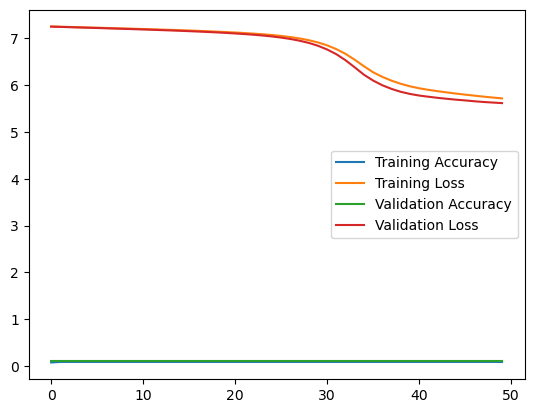

In [80]:
# Plotting results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

**Retraining**

In [81]:
history = model.fit(x,y,batch_size = 256 , epochs = 10 ,callbacks=[cp_callback]) 


Epoch 1/10
 1/28 [>.............................] - ETA: 15s - loss: 5.8749 - accuracy: 0.0742

28/28 [==============================] - ETA: 0s - loss: 5.6776 - accuracy: 0.0922
Epoch 1: saving model to lstm-model-DN-v1.ckpt
28/28 [==============================] - 13s 462ms/step - loss: 5.6776 - accuracy: 0.0922
Epoch 2/10
28/28 [==============================] - ETA: 0s - loss: 5.6602 - accuracy: 0.0922
Epoch 2: saving model to lstm-model-DN-v1.ckpt
28/28 [==============================] - 12s 421ms/step - loss: 5.6602 - accuracy: 0.0922
Epoch 3/10
28/28 [==============================] - ETA: 0s - loss: 5.6446 - accuracy: 0.0922
Epoch 3: saving model to lstm-model-DN-v1.ckpt
28/28 [==============================] - 12s 431ms/step - loss: 5.6446 - accuracy: 0.0922
Epoch 4/10
28/28 [==============================] - ETA: 0s - loss: 5.6304 - accuracy: 0.0922
Epoch 4: saving model to lstm-model-DN-v1.ckpt
28/28 [==============================] - 11s 410ms/step - loss: 5.6304 - accuracy: 0.0922
Epoch 5/10
28/28 [==============================] - ETA: 0s - loss: 5.6179 - accuracy: 

**Load Model**

In [82]:
# Loads the weights
model.load_weights(checkpoint_path)

In [83]:
len(lines)

7086

**Generating question with trained model**

In [84]:
def generate_question(model, tokenizer, seed_text, seq_length, num_words):
    result = seed_text
    for _ in range(num_words):
        # Tokenize the input text
        input_seq = tokenizer.texts_to_sequences([seed_text])[0]
        # Pad the input sequence
        input_seq = pad_sequences([input_seq], maxlen=seq_length, truncating='pre')
        # Predict the next word
        predicted_word_index = np.argmax(model.predict(input_seq), axis=-1)
        # Convert the index back to a word
        predicted_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                predicted_word = word
                break
        # Update the input text for the next iteration
        seed_text += " " + predicted_word
        result += " " + predicted_word
    return result



In [88]:
# Example usage
seed_text = "What"
generated_question = generate_question(model, tokenizer, seed_text, seq_length, num_words=10)
print("Generated Question:", generated_question)


1/1 [==============================] - 0s 52ms/step
Generated Question: What the the the the the the the the the the
